# Deep Learning

## Error In sample vs Error Out of sample

### Activity

1) Take CIFAR 10 dataset
2) Create a NN model
3) Take different values of n samples to train and test the model (i.e. 100, 1000, 1800, 2450 etc.)
4) Compute and save the error in/out sample
5) Repeat the experiment 5 times for every value of n
6) Plot num_of_data vs error mean in sample/out sample with the respective standard deviation of the 5 trials
7) Repeat with a more robust model (a deeper NN for example)

In [1]:
import cv2 #computer vision pack
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
cifar = tf. keras.datasets.cifar10 #call to the dataset

In [3]:
#Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

(x_train,y_train), (x_test, y_test) = cifar.load_data() #split the dataset

In [4]:
print(f"The shape of x_train: {x_train.shape}")
print(f"The shape of y_train: {y_train.shape} \n")

print(f"The shape of x_test: {x_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of x_train: (50000, 32, 32, 3)
The shape of y_train: (50000, 1) 

The shape of x_test: (10000, 32, 32, 3)
The shape of y_test: (10000, 1)


In [5]:
#normalize the data

x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) #Flatten each input of 32*32*3 as a simple vector

model1.add(tf.keras.layers.Dense(10, activation = "softmax"))

model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

#model1.fit(x_train,y_train, epochs = 3)

model1.save("cifar1.model")

INFO:tensorflow:Assets written to: cifar1.model\assets


INFO:tensorflow:Assets written to: cifar1.model\assets


In [7]:
#definition of the model 1

model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) #Flatten each input of 32*32*3 as a simple vector
model1.add(tf.keras.layers.Dense(10, activation = "softmax"))
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model1.save("model1")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [8]:
#definition of the model 2

model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) #Flatten each input of 32*32*3 as a simple vector
model2.add(tf.keras.layers.Dense(15, activation = "relu"))
model2.add(tf.keras.layers.Dense(10, activation = "softmax"))
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model2.save("model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [9]:
#model_name should be a string

def model_test(x_train, y_train, x_test, y_test, num_data, model_name):

    #Load the model
    loaded_model1 = tf.keras.models.load_model(model_name)

    num_samples=[]
    e_out=[]
    e_in=[]

    epoch = 20

    for n in num_data:
        trial_in = [] #For every value of n I need to repeat the experiment 5 times so I will save those experiment results here
        trial_out = []
        num_samples.append(n)

        if n<=20:
            batch = n
        elif n<=100:
            batch = 32
        else:
            batch = 64
            
        for j in range(4):
            #Select n random indices from 0 to x_train.shape[0] 
            indices = np.random.choice(x_train.shape[0], n, replace=False)

            # Use these indices to create a new array such that only have the selected samples from the entire dataset
            x_train_df = x_train[indices] #This is the data I will use to train the model
            y_train_df = y_train[indices] #This are the classes of the selected samples

            validation_indexes = np.random.choice(x_train.shape[0], math.floor(n*.20), replace=False)
            validation_x = x_train[validation_indexes]
            validation_y = y_train[validation_indexes]

            #Let's fit the model
            early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) #this will stop if the model is no longer learning
            loaded_model1.fit(x_train_df, y_train_df, batch_size = batch, epochs = epoch, validation_data=(validation_x, validation_y), callbacks=[early_stopping] ) #fit the model

            loss_in , acuracy_in = loaded_model1.evaluate(x_train_df,y_train_df) #check in sample error
            loss_out , acuracy_out = loaded_model1.evaluate(x_test,y_test) #check out sample error

            trial_in.append(loss_in)
            trial_out.append(loss_out)

        e_out.append(trial_out)
        e_in.append(trial_in)

    
    medians_out = [np.median(trial) for trial in e_out]
    variances_out = [np.var(trial) for trial in e_out]

    medians_in = [np.median(trial) for trial in e_in]
    variances_in = [np.var(trial) for trial in e_in]

    #We need to use the standard deviation, because the units of the variance are the ones of the medians but squared
    std_devs_in = [np.sqrt(variance) for variance in variances_in]
    std_devs_out = [np.sqrt(variance) for variance in variances_out]

    return medians_in, std_devs_in, medians_out, std_devs_out, num_samples


In [10]:
num_data= [20,60,100,1000,2000,3800,5000,8000,10000]

medians_in, std_devs_in, medians_out, std_devs_out, num_samples = model_test(x_train, y_train, x_test, y_test, num_data, "model1")

medians_in2, std_devs_in2, medians_out2, std_devs_out2, num_samples2 = model_test(x_train, y_train, x_test, y_test, num_data, "model2")


Epoch 1/20
1/1 [==============================] - 1s 575ms/step - loss: 2.2774 - accuracy: 0.0000e+00 - val_loss: 2.4684 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 28ms/step - loss: 2.0401 - accuracy: 0.0000e+00 - val_loss: 2.5331 - val_accuracy: 0.0000e+00
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 2.6463 - accuracy: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 0s 56ms/step - loss: 2.6656 - accuracy: 0.0000e+00 - val_loss: 1.9312 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 25ms/step - loss: 2.5920 - accuracy: 0.0000e+00 - val_loss: 1.8735 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: 2.4524 - accuracy: 0.0000e+00 - val_loss: 1.8666 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 26ms/step - loss: 2.3201 - accuracy: 0.0000e+00 - val_loss: 1.9159 - val_accuracy: 0.0000e+00
Epoch 5/20
31

In [11]:
def plot_errors(medians_in, std_devs_in, medians_out, std_devs_out, num_samples, model_name):
    plt.figure(figsize=(10,7))

    plt.plot(num_samples, medians_in, color='blue', label='E_in')

    # Plotting the variance as color shadow
    plt.fill_between(num_samples, 
                 [median - std_dev for median, std_dev in zip(medians_in, std_devs_in)], 
                 [median + std_dev for median, std_dev in zip(medians_in, std_devs_in)], 
                 color='blue', alpha=0.3)

    plt.plot(num_samples, medians_out, color='red', label='E_out')

    plt.fill_between(num_samples, 
                 [median - std_dev for median, std_dev in zip(medians_out, std_devs_out)], 
                 [median + std_dev for median, std_dev in zip(medians_out, std_devs_out)], 
                 color='red', alpha=0.3)
    
    
    plt.xlabel('# samples')
    plt.ylabel('Error')
    plt.title(f'Learning Curves {model_name}')
    plt.legend()

    plt.show()

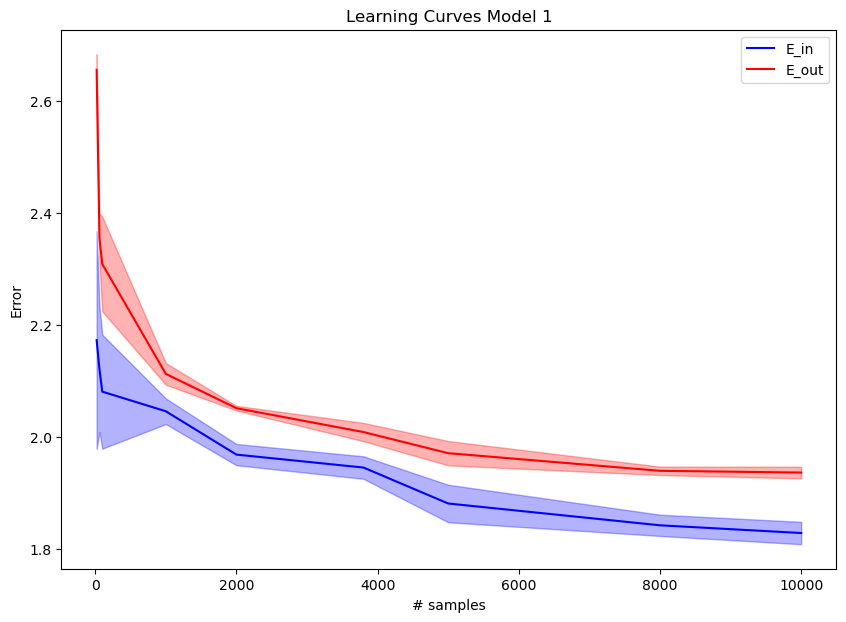

In [12]:
plot_errors(medians_in, std_devs_in, medians_out, std_devs_out, num_samples, "Model 1")

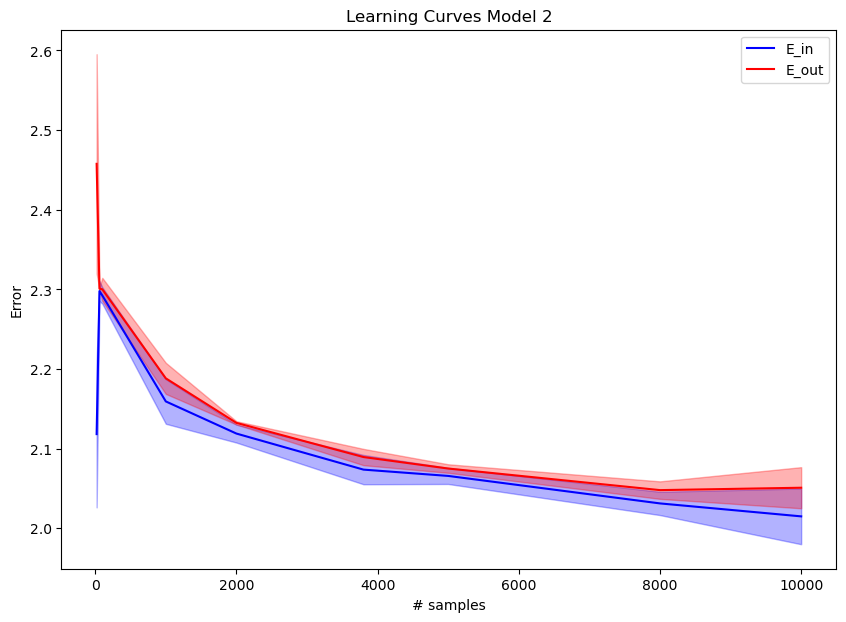

In [13]:
plot_errors(medians_in2, std_devs_in2, medians_out2, std_devs_out2, num_samples, "Model 2")